In [1]:
%matplotlib inline

# SYDE 522 Assignment 2
## Clustering and SVMs

### Due: Friday Oct 20 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1

**a) [2 marks]** The following code generates the same data that was used to demonstrate K-means clustering in class.  Note that since this question is about clustering, which is an unsupervised technique, we will not be using the `y` variable and will instead just use `x`, which will have 500 data points, each of which is two-dimensional.

```python
import sklearn.datasets
x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)
```

Implement K-means clustering on this data, with k=3.  Run enough iterations for it to converge to a stable classification (probably around 4-5 iterations).  Generate a scatterplot that shows each learned category in a different colour.  For example, if you have an array `output` which contains the learned category for each item and those values were `0`, `1`, and `2`, you could generate the plot with the following code:  

```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
```

In [2]:
import sklearn.datasets
x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)

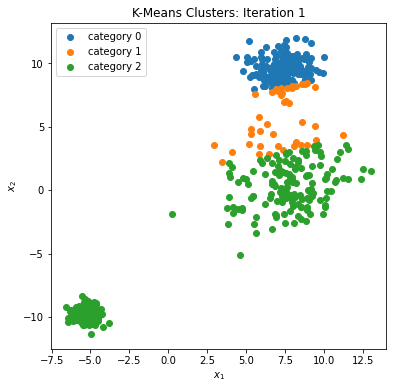

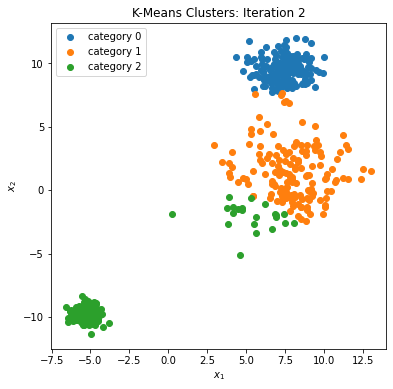

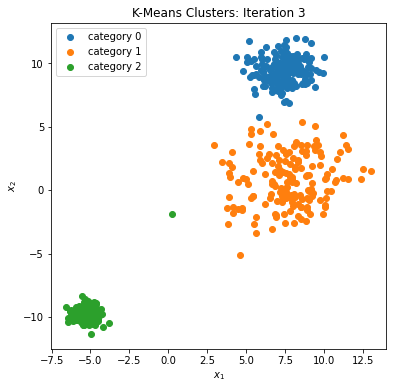

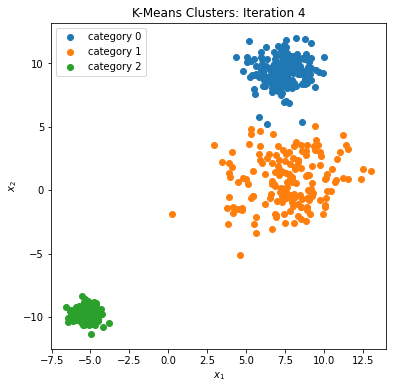

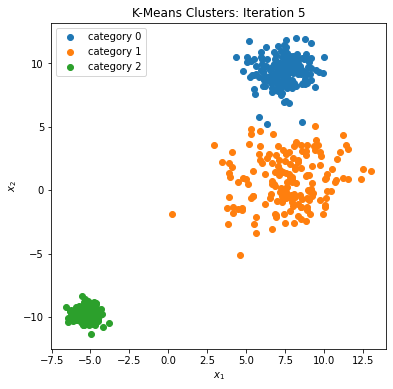

In [28]:
import numpy as np
import matplotlib.pyplot as plt

"""
k-means clustering:
1) pick 3 random prototypes
2) a sample belongs in a cluster if it is closest to that cluster's prototype
3) for next iteration, new protoypes = mean of clusters
"""

# random initialization of prototypes
np.random.seed(42)
indices = np.random.choice(x.shape[0], 3, replace=False)
prototypes = x[indices]

# run k-means for 5 iterations
for i in range(1, 6):
    labels = []
    for sample in x:
        # calculate euclidean distances between sample and all prototypes
        distances = []
        for prototype in prototypes:
            distances.append(np.linalg.norm(prototype - sample))

        # cluster label is index of minimum sample-prototype distance
        cluster = distances.index(min(distances))
        labels.append(cluster)
    
    # initializing empty list for cluster means
    cluster_means = []
    
    # iterating through clusters
    for cluster in range(3):
        # find all indices where cluster label == i (0, 1, 2)
        indices = [idx for idx, label in enumerate(labels) if label == cluster]

        # calculate mean of cluster
        cluster_mean = np.mean(x[indices], axis=0)
        cluster_means.append(cluster_mean)
    
    # plot scatterplot of clustered samples
    plt.figure(figsize=(6,6))
    
    plt.scatter(x[np.array(labels)==0,0], x[np.array(labels)==0,1], label='category 0')
    plt.scatter(x[np.array(labels)==1,0], x[np.array(labels)==1,1], label='category 1')
    plt.scatter(x[np.array(labels)==2,0], x[np.array(labels)==2,1], label='category 2')
    plt.legend()
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'K-Means Clusters: Iteration {i}')    
    plt.show()
    
    # set cluster means as new prototypes
    prototypes = cluster_means

**b) [1 mark]** For the same model you ran in part a), compute the "Loss" as the model is learning.  The Loss is defined as $\sqrt{{1 \over N}\sum_k \sum_i (x_i-c_k)^2}$, where N is the number of items (500), the sum over $k$ is over the 3 categories, the sum over $i$ is over the items in the current category, $x_i$ is the item itself, and $c_k$ is the prototype item for that category.  Compute the Loss after zero iterations (i.e. for the initial randomly chosen prototypes), and then after each iteration of the k-means clustering algorithm.  Generate a plot with the number of iterations on the x-axis and the Loss on the y-axis.

In [40]:
# random initialization of prototypes
np.random.seed(42)
indices = np.random.choice(x.shape[0], 3, replace=False)
prototypes = x[indices]

# empty list for total loss
loss = []

# run k-means for 5 iterations
for i in range(1, 6):
    labels = []
    for sample in x:
        # calculate euclidean distances between sample and all prototypes
        distances = []
        for prototype in prototypes:
            distances.append(np.linalg.norm(prototype - sample))

        # cluster label is index of minimum sample-prototype distance
        cluster = distances.index(min(distances))
        labels.append(cluster)

    # initializing empty lists for cluster means and sum of squared distances 
    cluster_means = []
    sum_squared_distances = []
    
    # iterating through clusters
    for cluster in range(3):
        indices = [] # indices where label matches iteration number
        squared_distances = [] # squared distances for cluster
        for idx, label in enumerate(labels):
            if label == cluster:
                # append index of element belonging to cluster
                indices.append(idx)
                
                # calculate squared distance of element from cluster prototype
                distance = np.linalg.norm(prototypes[cluster] - x[idx])
                squared_distances.append(distance**2)
                
        # append sum of squared distances to list
        sum_squared_distances.append(sum(squared_distances))
        
        # calculate mean of cluster
        cluster_mean = np.mean(x[indices], axis=0)
        cluster_means.append(cluster_mean)
                
    # calculate total loss for all clusters
    loss.append((1/len(x))*np.sqrt(sum(sum_squared_distances)))
    
    # set cluster means as new prototypes
    prototypes = cluster_means

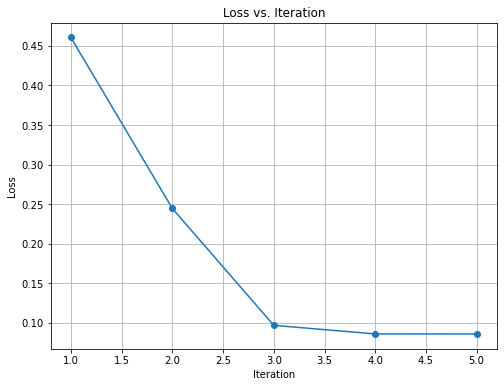

In [44]:
# plot loss vs iteration
iterations = range(1, len(loss) + 1)

plt.figure(figsize=(8,6))
plt.plot(iterations, loss, marker='o', linestyle='-')
plt.title('Loss vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

**c) [1 mark]** Perform k-means clustering on the same data, but for values of k between 1 and 14, inclusive.  For each k-value perform enough iterations for the clustering to be stable.  After it is stable, compute the Loss.  Generate a plot with the value of k on the x-axis, and the Loss on the y-axis.

Given this plot, what is a good value for k?  Why?

In [83]:
def kmeans(samples, k, iterations, plotLoss=False):
    # random initialization of prototypes
    np.random.seed(42)
    indices = np.random.choice(samples.shape[0], 3, replace=False)
    prototypes = samples[indices]

    # empty list for total loss by iteration
    loss = []
    
    # run k-means for number of iterations set by user
    for i in range(iterations):
        labels = []
        for sample in samples:
            # calculate euclidean distances between sample and all prototypes
            distances = []
            for prototype in prototypes:
                distances.append(np.linalg.norm(prototype - sample))

            # cluster label is index of minimum sample-prototype distance
            cluster = distances.index(min(distances))
            labels.append(cluster)

        # initializing empty lists for cluster means and sum of squared distances
        cluster_means = []
        sum_squared_distances = []
        
        # iterating through clusters
        for cluster in range(k):
            indices = [] # indices where label matches iteration number
            squared_distances = [] # squared distances for cluster
            for idx, label in enumerate(labels):
                if label == cluster:
                    # append index of element belonging to cluster
                    indices.append(idx)

                    # calculate squared distance of element from cluster prototype
                    distance = np.linalg.norm(prototypes[cluster] - x[idx])
                    squared_distances.append(distance**2)

            # append sum of squared distances to list
            sum_squared_distances.append(sum(squared_distances))

            # calculate mean of cluster
            cluster_mean = np.mean(x[indices], axis=0)
            cluster_means.append(cluster_mean)

        # calculate total loss for all clusters
        loss.append((1/len(x))*np.sqrt(sum(sum_squared_distances)))
        
        # set cluster means as new prototypes
        prototypes = cluster_means
    
    # plot loss vs iteration if desired
    if plotLoss:
        iterations = range(1, len(loss) + 1)

        plt.figure(figsize=(8,6))
        plt.plot(iterations, loss, marker='o', linestyle='-')
        plt.title(f'Loss vs. Iteration: k = {k}')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()
    
    # return loss of most stable iteration
    return loss[-1]

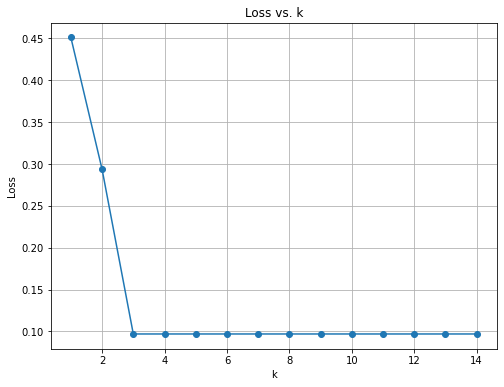

In [84]:
# plotting loss vs k
loss = []
k = 14
for k in range(1, k+1):
    loss.append(kmeans(x, k, 3, False))
    
iterations = range(1, k+1)

plt.figure(figsize=(8,6))
plt.plot(iterations, loss, marker='o', linestyle='-')
plt.title(f'Loss vs. k')
plt.xlabel('k')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

**Answer:**
Given the loss vs. k plot above, the best value for k is 3 as the "elbow" of the curve occurs here. This means that there is a significant drop in error between k=2 and k=3, but beyond k=3 the error does not significantly change. Loss marginally decreases beyond k=3, but greater values of k can lead to overfitting, therefore k=3 is the best choice for this parameter.

### Question 2:


**a) [1 mark]** The pre-written implementation of k-means clustering can be used with the following commands:

```python
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(x)
output = kmeans.predict(x)
```

Use this implementation of k-means clustering to repeat question 1a) and generate the same plot.

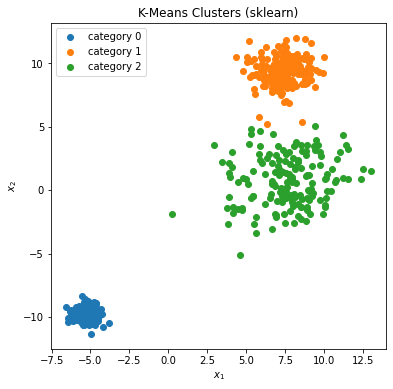

In [86]:
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(x)
labels = kmeans.predict(x)

# plot scatterplot of clustered samples
plt.figure(figsize=(6,6))

plt.scatter(x[np.array(labels)==0,0], x[np.array(labels)==0,1], label='category 0')
plt.scatter(x[np.array(labels)==1,0], x[np.array(labels)==1,1], label='category 1')
plt.scatter(x[np.array(labels)==2,0], x[np.array(labels)==2,1], label='category 2')
plt.legend()

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title(f'K-Means Clusters (sklearn)')    
plt.show()

**b) [1 mark]** The digit image dataset that was used in assignment 1 can be loaded with the following commands:

```python
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data
```

Use the `sklearn` implementation of k-means clustering to form 10 categories from this data.  Plot the results, using the following code which will show the first 12 items in each of the 10 categories.

```python
plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()
```

How does this clustering compare to the natural clustering into the 10 digits that a person might apply to this same data?  What similarities and differences do you see?  (Note: you don't need a quantitative answer to this question; I'm looking for more qualitative answers).

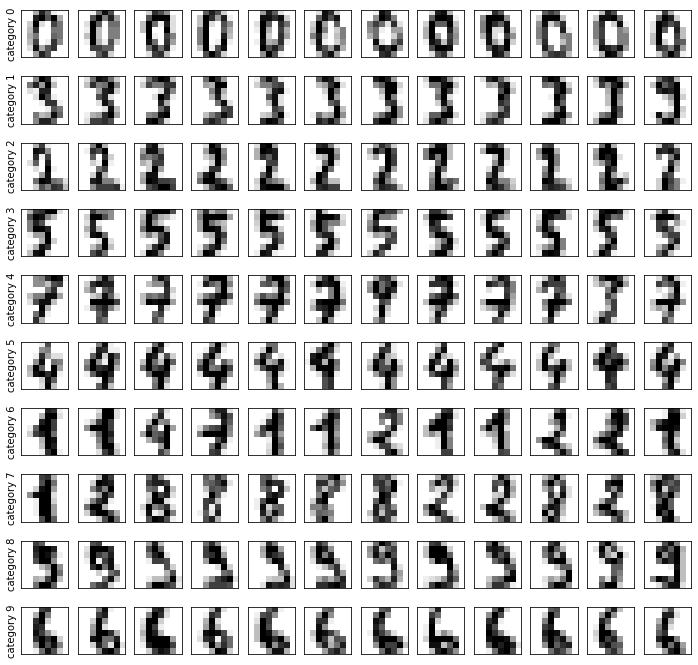

In [89]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data

import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=10)
kmeans.fit(x)
labels = kmeans.predict(x)

# plot results
plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(labels==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()

**Answer:** Most of the model's clusters align with how a person would intuitively cluster numbers from a range of 10 digits into 10 clusters - one cluster assigned to each digit. For example, category 0 contains 0s, category 1 contains 3s, category 2 contains 2s, etc. There are some exceptions where a cluster contains more than 1 unique digit, such as category 7, which seems to contain 1s, 2s and 8s. This makes sense as the model is grouping based on distance calculations, and cannot adapt to variation in how digits are written, unless different features were used.

**c) [1 mark]** The following code will perform Hierarchical Clustering (also known as Agglomerative Clustering).  Apply this to the digits data from the previous question and generate the same plot.

```python
agglom = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
agglom.fit(digits.data)
output = agglom.labels_
```

How does this clustering compare to the natural clustering into 10 digits and to the clustering in part b)?  What similarities and differences do you see?

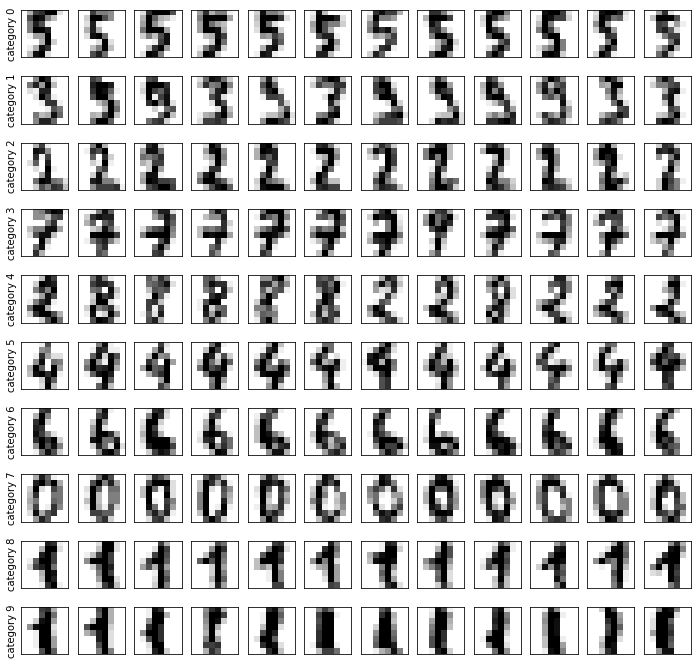

In [90]:
agglom = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
agglom.fit(digits.data)
labels = agglom.labels_

# plot results
plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(labels==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()

**Answer:** Similarly to part b) most clusters appear to contain one unique digit, as a person might intuitively cluster this data. Unlike part b), the hierarchical clustering model seems to assign 1s to two clusters (category 8 and 9), where cluster 9 contains wide vertical digits. It's unclear to me if they are in fact 1s. The model also groups more than 1 digit in the same cluster. 9s appear to be grouped with 3s in category 1 and 4s in category 5, and category 4 comprises 2s and 8s. 

### Question 3:

**a) [2 marks]** The following code generates the data used to demonstrate the SVM in class (notice that the two categories are now `1` and `-1` rather than `1` and `0`).

```python
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1
```

Implement the version of the SVM with a learning rule.  This is the version where we modify the Perceptron learning rule to produce a new learning rule that will try to minimize $\omega$ while trying to keep one category with $\omega\cdot x +b>1$ and the other with $\omega\cdot x + b < -1$.  Apply it to the data generated above.  Use a learning rate of 0.01 and a $\lambda$ value of 0.001.  Initialize it with $\omega=[0,0]$ and $b=0$.  Perform 200 iterations of the learning rule through all the data points (so the learning rule will be applied a total of 200 x 200 = 40000 times).  This should be enough for it to stablize to the optimal decision boundary.

Generate a scatterplot showing the results.  This should show the data points, coloured differently for the two categories.  Also report the final $\omega$ and $b$ values.  In addition, plot the decision boundary line $\omega\cdot x +b=0$ along with the two other boundary lines $\omega\cdot x +b=1$ and $\omega\cdot x +b=-1$.  One way to generate those lines is to use the following code:

```python
xx = np.array([-4, 8])
yy = (b-xx*w0) / w1
yy_upper = ((b+1)-xx*w0) / w1
yy_lower = ((b-1)-xx*w0) / w1
plt.plot(xx, yy)
plt.plot(xx, yy_upper)
plt.plot(xx, yy_lower)
plt.xlim(-3, 6)
plt.ylim(-3, 6)
```

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# generating data and labels
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1

In [52]:
class SVM:
    def __init__(self, alpha, lambd, n_iters):
        self.alpha = alpha
        self.lambd = lambd
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def predict(self, X):
        output = np.dot(X, self.w) + self.b
        return np.sign(output) # +1 if output > 0, -1 if output < 0
                
    def train(self, X, y):
        n_samples, n_features = X.shape
        
        # initialize weights and bias as 0
        self.w = np.zeros(n_features)
        self.b = 0
        
        weights = [] # empty list for storing weights after every iteration
        # apply learning rule for n=200 iterations
        for _ in range(self.n_iters):
            for i, x_i in enumerate(X):
                decision = y[i]*(np.dot(x_i, self.w) + self.b)
                if decision >= 1:
                    self.w -= self.alpha*self.w
                else:
                    self.w -= self.alpha*(self.w - self.lambd*y[i]*x_i)
                    self.b += self.alpha*self.lambd*y[i]
            weights.append(self.w.copy())
        return weights

In [53]:
# initialize svm object
svm = SVM(alpha=0.00001, lambd=1000, n_iters=200)

# train over 200 iterations
weights = svm.train(x, y)

# predict
pred = svm.predict(x)

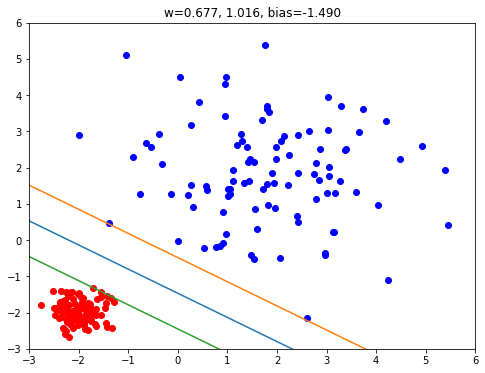

In [54]:
# scatterplot with different colors for two categories
plt.figure(figsize=(8, 6))
plt.scatter(x[pred==1][:,0], x[pred==1][:,1], c='b')
plt.scatter(x[pred==-1][:,0], x[pred==-1][:,1], c='r')

# calculating decision boundary lines
w0, w1 = svm.w 
b = svm.b
xx = np.array([-4, 8])
yy = (-b-xx*w0) / w1
yy_upper = ((-b+1)-xx*w0) / w1
yy_lower = ((-b-1)-xx*w0) / w1

# plot decision boundary lines
plt.plot(xx, yy)
plt.plot(xx, yy_upper)
plt.plot(xx, yy_lower)
plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.title(f'w={w0:.3f}, {w1:.3f}, bias={-b:.3f}')

plt.show()

**b) [1 mark]** For the SVM you implemented in part a), plot the magnitude of $\omega$ over the 200 interations (i.e. plot the initial value of $|\omega|=\sqrt{\omega_0^2+\omega_1^2}$, the value after applying the learning rule to each data point once, the value after applying it to each data point twice, and so on up to 200 times).  Does the resulting value for $\omega$ converge?  

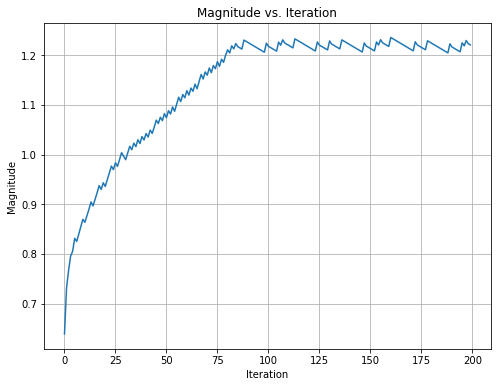

In [56]:
magnitude = []
for w in weights:
    magnitude.append(np.linalg.norm(w))
    
iterations = range(200)

# plot magnitude vs iterations
plt.figure(figsize=(8,6))
plt.plot(iterations, magnitude, linestyle='-')
plt.grid(True)

plt.title('Magnitude vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Magnitude')

plt.show()

**Answer:** The magnitude of the weights converge at just above 1.2 after 100 iterations.

**c) [1 mark]** The following code generates the data set with two circles, one inside the other.

```python
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
```

Apply your implementation of the SVM to this data and plot the result after 100 iterations.  Use the same parameters as before and generate the same plot as in part a).

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# generating data and labels
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
y[y==0] = -1

In [58]:
# initialize svm object
svm = SVM(alpha=0.00001, lambd=1000, n_iters=200)

# train over 200 iterations
weights = svm.train(x, y)

# predict
pred = svm.predict(x)

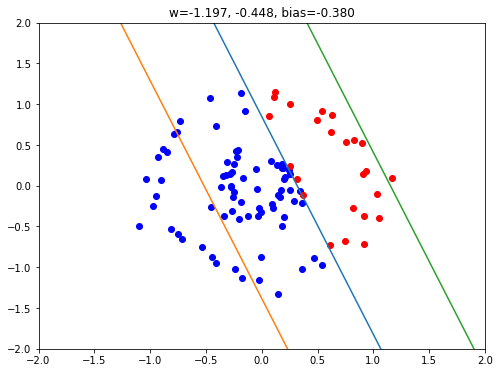

In [60]:
# scatterplot with different colors for two categories
plt.figure(figsize=(8, 6))
plt.scatter(x[pred==1][:,0], x[pred==1][:,1], c='b')
plt.scatter(x[pred==-1][:,0], x[pred==-1][:,1], c='r')

# calculating decision boundary lines
w0, w1 = svm.w 
b = svm.b
xx = np.array([-4, 8])
yy = (-b-xx*w0) / w1
yy_upper = ((-b+1)-xx*w0) / w1
yy_lower = ((-b-1)-xx*w0) / w1

# plot decision boundary lines
plt.plot(xx, yy)
plt.plot(xx, yy_upper)
plt.plot(xx, yy_lower)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title(f'w={w0:.3f}, {w1:.3f}, bias={-b:.3f}')

plt.show()

**d) [1 mark]** Repeat part c) but augment the data so that there is an additional feature computed as $x_1^2+x_2^2$.  This should make it possible for the SVM to learn a boundary between the datasets in the new 3-dimensional space.

Plot the resulting classification.  You just need to plot the data points, coloured by which category they are in.  You do not need to plot the decision boundaries.

In [61]:
# augmenting x
x3 = (x[:,0]**2 + x[:,1]**2)
x = np.column_stack((x, x3))

# initialize svm object
svm = SVM(alpha=0.00001, lambd=1000, n_iters=200)

# train over 200 iterations
weights = svm.train(x, y)

# predict
pred = svm.predict(x)

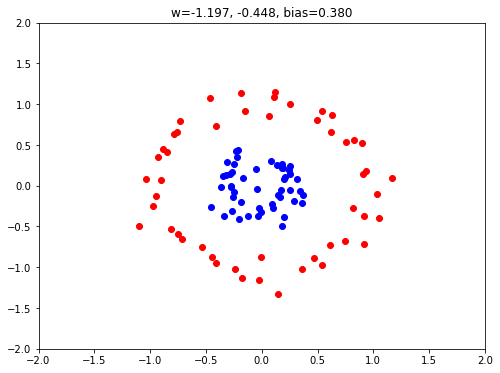

In [62]:
# scatterplot with different colors for two categories
plt.figure(figsize=(8, 6))
plt.scatter(x[pred==1][:,0], x[pred==1][:,1], c='b')
plt.scatter(x[pred==-1][:,0], x[pred==-1][:,1], c='r')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title(f'w={w0:.3f}, {w1:.3f}, bias={b:.3f}')

plt.show()

### Question 4:

**a) [1 mark]** The `sklearn` implementation of a Linear SVM (i.e. one with using the Kernel Trick) can be used as follows:

```python
svm = sklearn.svm.LinearSVC(C=1)
svm.fit(x, y)
output = svm.predict(x)
value = svm.decision_function(x)
```

(note that we use `predict` if we want the output to indicate a category label, but we use `decision_function` to get the value of $\omega \cdot x + b$)

Use this implementation to repeat question 3a.  Use a cost `C=100`.  Instead of plotting the decision boundary lines, use the following code to compute the output for a big grid of data points and plot the output as an image (as was done in class):

```python
extent = (-3, 6, -3, 6)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
```

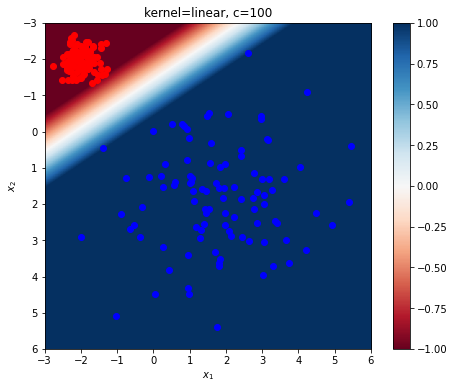

In [239]:
import sklearn.datasets
import sklearn.svm

# generating data and labels
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1

# generation svm predictions
svm = sklearn.svm.LinearSVC(C=100, max_iter=10000)
svm.fit(x, y)
output = svm.predict(x)

# create figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# scatterplot with different colors for two categories
plt.scatter(x[output==1][:,0], x[output==1][:,1], c='b')
plt.scatter(x[output==-1][:,0], x[output==-1][:,1], c='r')

# plot labels
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('kernel=linear, c=100')

# plot output as image
extent = (-3, 6, -3, 6)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))

cbar = plt.colorbar(im, ax=ax)

plt.show()

**b) [1 mark]** Repeat question 4a) using the nested circles data set from 3c.  Show the resulting plot.  Now repeat this again with the same data, but using the `sklearn` implementation of an SVM with a Gaussian Radial Basis Function kernel, which can be accessed using `svm = sklearn.svm.SVC(kernel='rbf', gamma=1, C=1)`.  Use $\gamma=1$ and $C=1$.  Show the resulting plot.

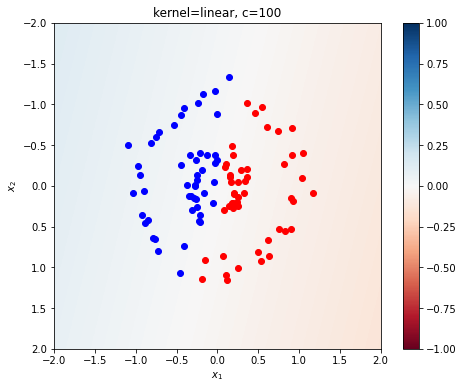

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# generating data and labels
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
y[y==0] = -1

# generation svm (linear kernel) predictions
svm = sklearn.svm.LinearSVC(C=100, max_iter=10000)
svm.fit(x, y)
output = svm.predict(x)

# create figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# scatterplot with different colors for two categories
plt.scatter(x[output==1][:,0], x[output==1][:,1], c='b')
plt.scatter(x[output==-1][:,0], x[output==-1][:,1], c='r')

# plot labels
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('kernel=linear, c=100')

# plot output as image
extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))

cbar = plt.colorbar(im, ax=ax)

plt.show()

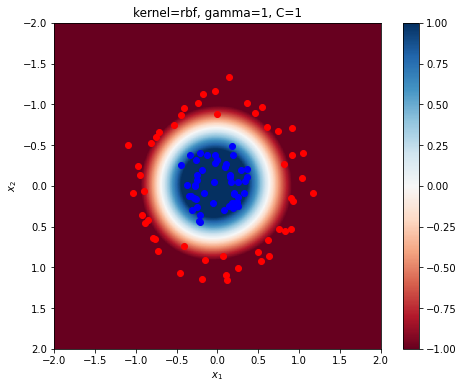

In [243]:
# generation svm (rbf kernel) predictions
svm = sklearn.svm.SVC(kernel='rbf', gamma=1, C=1)
svm.fit(x, y)
output = svm.predict(x)

# create figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# scatterplot with different colors for two categories
plt.scatter(x[output==1][:,0], x[output==1][:,1], c='b')
plt.scatter(x[output==-1][:,0], x[output==-1][:,1], c='r')

# plot labels
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('kernel=rbf, gamma=1, C=1')

# plot output as image
extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))

cbar = plt.colorbar(im, ax=ax)

plt.show()

**c) [1 mark]** Here is the code to generate the overlapping dataset discussed in class.

```python
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
```

Use the methodology from class to optimize $\gamma$ and $C$.  Use 20% of the data for testing.  When doing cross-validation, split your training data into 80% training and 20% validation and repeat 40 times to take the average.  Plot the cross-validation accuracy for different $C$ and $\gamma$ values.  To generate this plot, you can use code like the following, assuming your validation accuracy scores are in a matrix `accuracy`:

```python
Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)
XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=[0,0.75,0.8,0.85, 0.9, 0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], gammas[::3], rotation=90)
plt.yticks(np.arange(len(Cs))[::3], Cs[::3])
```

Given your final choice of $\gamma$ and $C$, re-train on all the training data, generate the same plot as in parts a and b.  Report the accuracy of the categorization on the test data.

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.model_selection
from sklearn.svm import SVC

# generating data and labels
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
y[y==0] = -1

# splitting data into training and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True
)

# cross-validation to optimize c and gamma
c_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 10, 100]

# empty matrix for accuracy values
accuracy = np.zeros((len(c_values), len(gamma_values)))

for c_idx, c in enumerate(c_values):
    for g_idx, g in enumerate(gamma_values):
        # split into random validation sets 40 times
        for i in range(40):
            x_vtrain, x_vtest, y_vtrain, y_vtest = sklearn.model_selection.train_test_split(
                x_train, y_train, test_size=0.2, shuffle=True
            )
            
            svm = SVC(kernel='rbf', gamma=g, C=c)
            svm.fit(x_vtrain, y_vtrain)
            output = svm.predict(x_vtest)
            
            # calculate accuracy and insert into matrix
            acc = np.mean(output == y_vtest)*100
            accuracy[c_idx, g_idx] = acc
            
print(accuracy)

[[ 50.     50.     56.25   46.875  56.25 ]
 [ 40.625  87.5    93.75   40.625  53.125]
 [ 93.75   87.5    93.75   87.5    62.5  ]
 [ 78.125  96.875 100.     87.5    71.875]
 [ 96.875  87.5    87.5    93.75   65.625]]


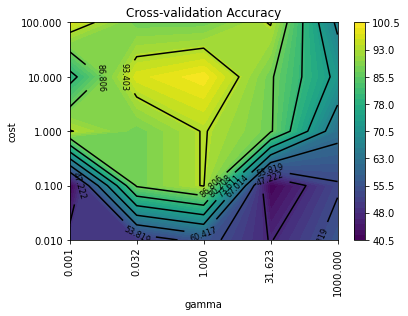

In [235]:
# plotting accuracy

# define grid of c and gamma values
Cs = np.logspace(-2, 2, len(c_values))
gammas = np.logspace(-3, 3, len(gamma_values))

# find the minimum and maximum accuracy values
min_acc = np.min(accuracy)
max_acc = np.max(accuracy)

# define contour levels based on the range of accuracy values
contour_levels = np.linspace(min_acc, max_acc, 10)

# create meshgrid based on dimensions of accuracy matrix
XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))

# create contour plot
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=contour_levels, colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)

# set tick labels for c and gamme values
plt.xticks(np.arange(len(gammas)), ["{:.3f}".format(gamma) for gamma in gammas], rotation=90)
plt.yticks(np.arange(len(Cs)), ["{:.3f}".format(C) for C in Cs])

# plot labels
plt.xlabel('gamma')
plt.ylabel('cost')
plt.title('Cross-validation Accuracy')

plt.show()

From the above plot and observing the cross-validation accuracy results, the model is optimized for gamma=1, C=10.

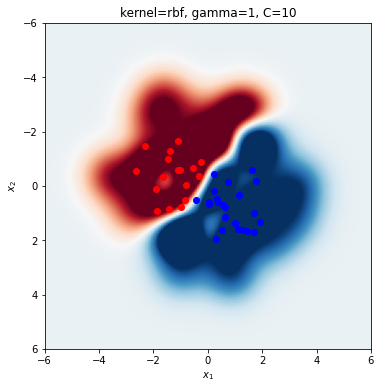

In [236]:
# training svm with optimized c and gamma values
svm = SVC(kernel='rbf', gamma=1, C=10)
svm.fit(x_train, y_train)
output = svm.predict(x_test)

# scatterplot with different colors for two categories
plt.figure(figsize=(8, 6))
plt.scatter(x_test[output==1][:,0], x_test[output==1][:,1], c='b')
plt.scatter(x_test[output==-1][:,0], x_test[output==-1][:,1], c='r')

# plot labels
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('kernel=rbf, gamma=1, C=10')

# plot output as image
extent = (-6, 6, -6, 6)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))

In [237]:
accuracy = np.mean(output == y_test)*100
print(f'Accuracy = {accuracy:.2f}%')

Accuracy = 90.00%
